In [39]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d



In [40]:
byboro = pd.read_csv('data/groupby_borough_5.csv')       #read a csv file
byclass = pd.read_csv('data/groupby_bldgclass_5.csv')     #read a csv file
byboro1 = pd.read_csv('data/groupby_borough.csv')       #read a csv file
byclass1 = pd.read_csv('data/groupby_bldgclass.csv')     #read a csv file

In [93]:
column_order = ['SI', 'BK', 'BX', 'QN', 'MN']

byboro_pivot_count = pd.pivot_table(byboro, values='bldg_count', index=['year'],
                    columns=['borough'],  fill_value=0)
byboro_pivot_area = pd.pivot_table(byboro, values='tot_area', index=['year'],
                    columns=['borough'], fill_value=0)
byboro1_pivot_count = pd.pivot_table(byboro1, values='bldg_count', index=['year'],
                    columns=['borough'],  fill_value=0)
byboro1_pivot_area = pd.pivot_table(byboro1, values='tot_area', index=['year'],
                    columns=['borough'], fill_value=0)
byboro1_pivot_count = byboro1_pivot_count.reindex(column_order, axis=1)
byboro1_pivot_area = byboro1_pivot_area.reindex(column_order, axis=1)

byclass_pivot_count = pd.pivot_table(byclass, values='bldg_count', index=['year'],
                    columns=['bldgtype'], fill_value=0)
byclass_pivot_area = pd.pivot_table(byclass, values='tot_area', index=['year'],
                    columns=['bldgtype'], fill_value=0)

byclass1_pivot_count = pd.pivot_table(byclass1, values='bldg_count', index=['year'],
                    columns=['bldgtype'], fill_value=0)
byclass1_pivot_area = pd.pivot_table(byclass1, values='tot_area', index=['year'],
                    columns=['bldgtype'], fill_value=0)




In [94]:
byboro1_pivot_area

borough,SI,BK,BX,QN,MN
year,,,,,
1795,0,0,0,0,3384
1799,0,0,0,0,17720
1800,6068,90239,13328,5418,42078
1802,0,0,0,4137,24885
1803,0,0,0,0,11250
...,...,...,...,...,...
2017,4061970,27283825,29036894,19080396,38347091
2018,2759742,30370936,13590616,11086969,28053828
2019,3907750,24154629,12357638,13791712,23601303


In [95]:
s = 3 #sigma

byboro1_pivot_count_smooth = pd.DataFrame(gaussian_filter1d(byboro1_pivot_count, sigma=s, axis=0),
                          columns= column_order)
byboro1_pivot_count_smooth.index = byboro1_pivot_count.index

byboro1_pivot_area_smooth = pd.DataFrame(gaussian_filter1d(byboro1_pivot_area, sigma=s, axis=0),
                          columns= column_order)
byboro1_pivot_area_smooth.index = byboro1_pivot_area.index

byclass1_pivot_count_smooth = pd.DataFrame(gaussian_filter1d(byclass1_pivot_count, sigma=s, axis=0),
                          columns= ['Commercial', 'Industrial', 'Mixed', 'Other', 'Residential'])
byclass1_pivot_count_smooth.index = byclass1_pivot_count.index

byclass1_pivot_area_smooth = pd.DataFrame(gaussian_filter1d(byclass1_pivot_area, sigma=s, axis=0),
                          columns= ['Commercial', 'Industrial', 'Mixed', 'Other', 'Residential'])
byclass1_pivot_area_smooth.index = byclass1_pivot_area.index

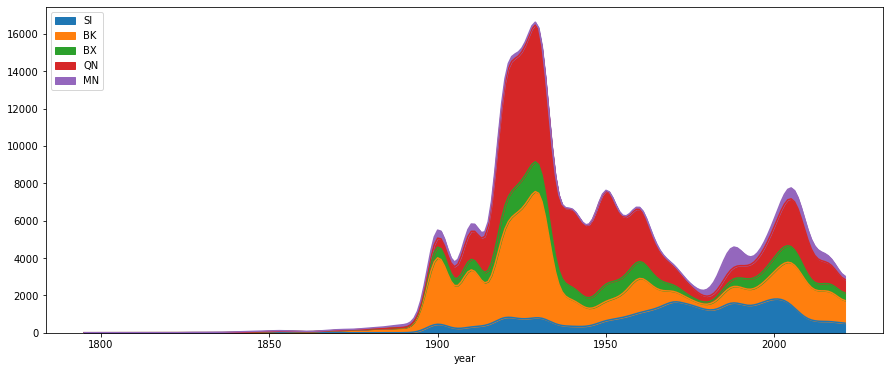

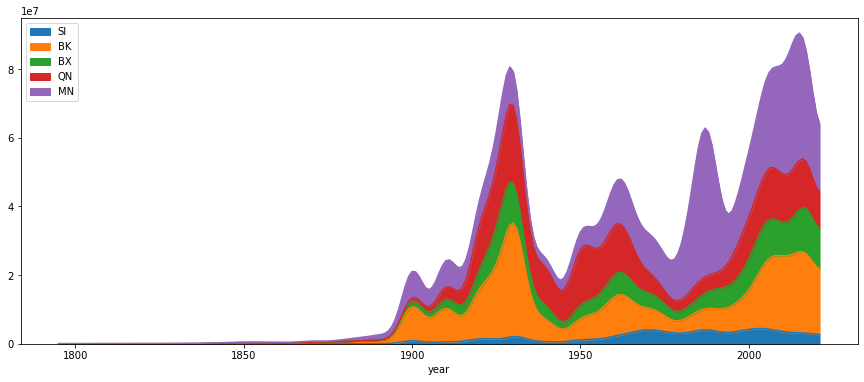

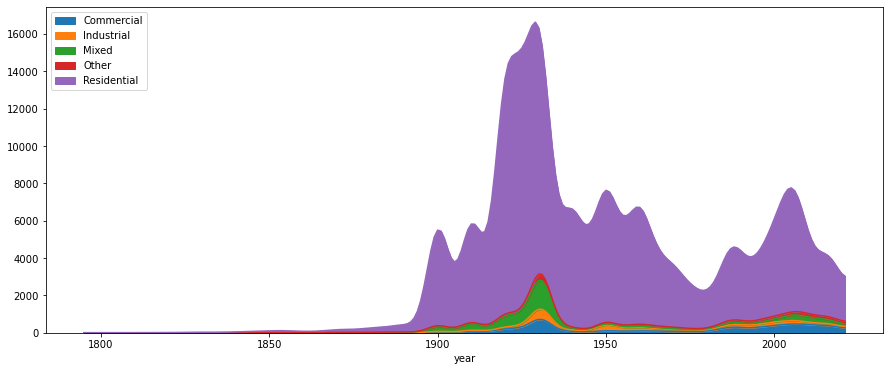

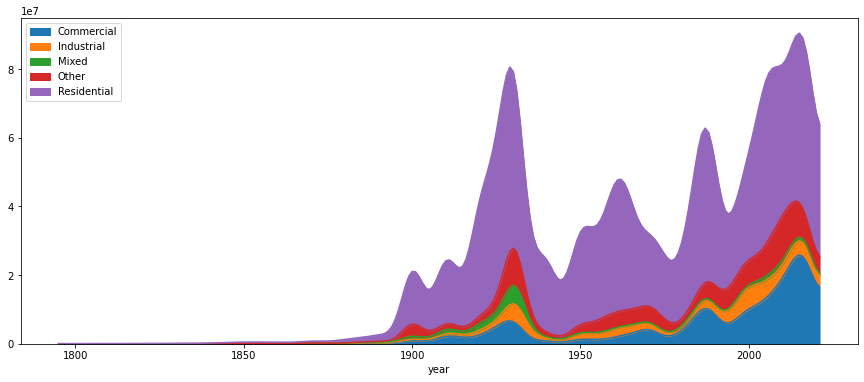

In [96]:
fig1 = byboro1_pivot_count_smooth.plot.area(stacked=True, figsize=(15, 6))
fig2 = byboro1_pivot_area_smooth.plot.area(stacked=True, figsize=(15, 6))
fig3 = byclass1_pivot_count_smooth.plot.area(stacked=True, figsize=(15, 6))
fig4 = byclass1_pivot_area_smooth.plot.area(stacked=True, figsize=(15, 6))

fig1.legend(loc='upper left')
fig2.legend(loc='upper left')
fig3.legend(loc='upper left')
fig4.legend(loc='upper left')

In [97]:
fig1.get_figure().savefig("byboro1_pivot_count_smooth.pdf")
fig2.get_figure().savefig("byboro1_pivot_area_smooth.pdf")
fig3.get_figure().savefig("byclass1_pivot_count_smooth.pdf")
fig4.get_figure().savefig("byclass1_pivot_area_smooth.pdf")